# 十五、Python画图
本章不做详细的解释, 通过代码注释形式给出.

Matplotlib是一个Python的2D绘图库，它以各种硬拷贝格式和跨平台的交互式环境生成出版质量级别的图形。通过 Matplotlib，开发者可以仅需要几行代码，便可以生成绘图，直方图，功率谱，条形图，错误图，散点图等。

以下内容来自「Github」，为《PythonDataScienceHandbook[1]》第四章「Matplotlib」介绍部分。全部内容都在以下环境演示通过：
    - numpy:1.18.5
    - pandas:1.0.5
    - matplotlib:3.2.1
[1]PythonDataScienceHandbook:https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks

## 1.简单的折线图
### 示例

对于图表来说，最简单的莫过于作出一个单一函数$y=-f(x)$的图像。本节中我们首先来介绍创建这种类型图表。

在Matplotlib中，图形（类plt.Figure的一个实例）可以被认为是一个包括所有维度、图像、文本和标签对象的容器。维度（类plt.Axes的一个实例）就是你上面看到的图像，一个有边界的格子包括刻度和标签，最终还有我们画在上面的图表元素。在本书中，我们会使用变量名fig来指代图形对象，以及变量名ax来指代维度变量。一旦我们创建了维度，我们可以使用ax.plot方法将数据绘制在图表上。

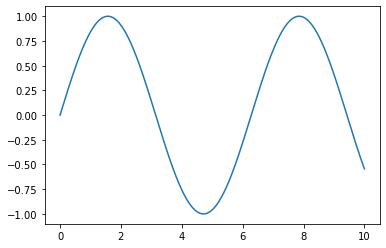

In [ ]:
# ax.plot方法

import matplotlib.pyplot as plt
import numpy as np

# 设置图形的标题和坐标轴标签
plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题


# 对于所有的 Matplotlib 图表来说，我们都需要从创建图形和维度开始。图形和维度可以使用下面代码进行最简形式的创建
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)

ax.plot(x, np.sin(x)) #使用ax.plot方法将数据绘制在图表上

同样的，我们可以使用 pylab 接口（MATLAB 风格的接口）帮我们在后台自动创建这两个对象：

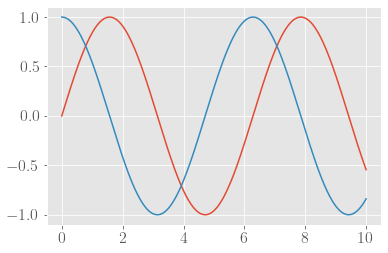

In [ ]:
# plt.plot方法
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x)) # 一个图中多个图像, 只需多调用几次plt.plot即可

这就是在 Matplotlib 中绘制简单函数图像的所有接口了。下面我们深入了解一下控制坐标轴和线条外观的细节。

### 调整折线图：线条颜色和风格

你可能第一个想到需要进行调整的部分就是线条的颜色和风格。plt.plot()函数接受额外的参数可以用来指定它们。通过指定color关键字参数可以调整颜色，这个字符串类型参数基本上能用来代表任何你能想到的颜色。可以通过多种方式指定颜色参数;如果没有指定颜色，Matplotlib 会在一组默认颜色值中循环使用来绘制每一条线条。

类似的，通过linestyle关键字参数可以指定线条的风格：

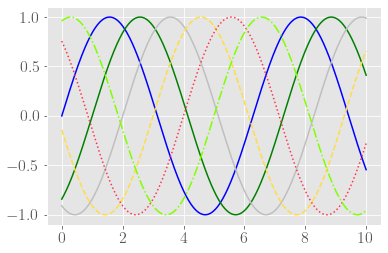

In [ ]:
# 颜色与线条
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x - 0), color='blue', linestyle='solid') # 颜色:通过颜色名称指定
plt.plot(x, np.sin(x - 1), color='g', linestyle='solid') # 颜色:通过颜色简写名称指定(rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75', linestyle='-') # 颜色:介于0-1之间的灰阶值; 线条:实线.
plt.plot(x, np.sin(x - 3), color='#FFDD44', linestyle='--') # 颜色:16进制的RRGGBB值; 线条:虚线.
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3), linestyle=':') # 颜色:RGB元组的颜色值，每个值介于0-1; 线条:点线.
plt.plot(x, np.sin(x - 5), color='chartreuse', linestyle='-.') # 颜色:能支持所有HTML颜色名称值; 线条:长短点虚线.


如果你喜欢更简洁的代码，这些linestyle和color参数能够合并成一个非关键字参数，传递给plt.plot()函数：

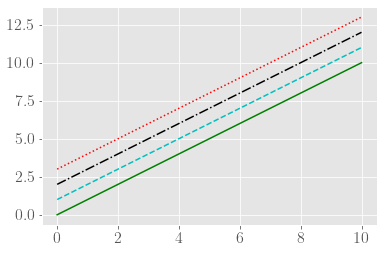

In [ ]:
# 简略版颜色与线条, 将color和linestyle参数能够合并成一个非关键字参数
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 1000)

plt.plot(x, x + 0, '-g')  # 绿色实线
plt.plot(x, x + 1, '--c') # 天青色虚线
plt.plot(x, x + 2, '-.k') # 黑色长短点虚线
plt.plot(x, x + 3, ':r')  # 红色点线

上面的单字母颜色码是 RGB 颜色系统以及 CMYK 颜色系统的缩写，被广泛应用在数字化图像的颜色系统中。

还有很多其他的关键字参数可以对折线图的外观进行精细调整；可以通过在 IPython 中使用帮助工具查看plt.plot()函数的文档来获得更多细节内容。

### 调整折线图：坐标轴范围
Matplotlib 会自动选择非常合适的坐标轴范围来绘制你的图像，但是有些情况下你也需要自己进行相关调整。使用plt.xlim()和plt.ylim()函数可以调整坐标轴的范围：

(-1.5, 1.5)

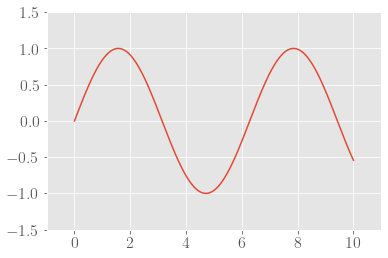

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

如果某些情况下你希望将坐标轴反向，你可以通过上面的函数实现，将参数顺序颠倒即可：

(1.2, -1.2)

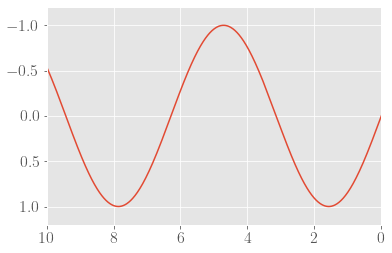

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.xlim(10, 0)
plt.ylim(1.2, -1.2)

相关的函数还有plt.axis()（注意：这不是plt.axes()函数，函数名称是 i 而不是 e）。这个函数可以在一个函数调用中就完成 x 轴和 y 轴范围的设置，传递一个[xmin, xmax, ymin, ymax]的列表参数即可：

(-1.0, 11.0, -1.5, 1.5)

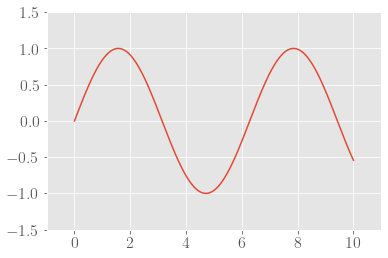

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5])

当然plt.axis()函数不仅能设置范围，还能像下面代码一样将坐标轴压缩到刚好足够绘制折线图像的大小：

(-0.5, 10.5, -1.0999971452300779, 1.099999549246729)

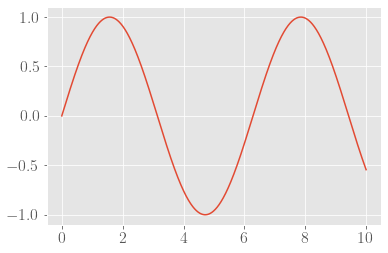

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.axis('tight')

还可以通过设置'equal'参数设置x轴与y轴使用相同的长度单位：

(-0.5, 10.5, -1.0999971452300779, 1.099999549246729)

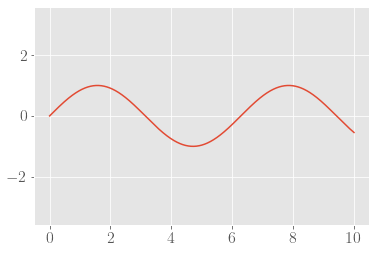

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.axis('equal')

更多关于设置 axis 属性的内容请查阅plt.axis函数的文档字符串。

### 折线图标签
本节最后介绍一下在折线图上绘制标签：标题、坐标轴标签和简单的图例。

标题和坐标轴标签是最简单的这类标签，Matplotlib 提供了函数用来方便的设置它们：

Text(0, 0.5, 'sin(x)')

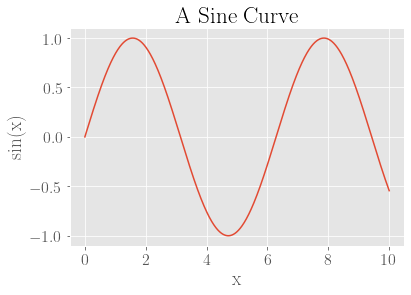

In [ ]:
# 标签
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")

这些标签的位置、大小和风格可以通过上面函数的可选参数进行设置。参阅 Matplotlib 在线文档和这些函数的文档字符串可以获得更多的信息。

当一幅图中绘制了多条折线时，如果能够绘制一个线条对应的图例能让图表更加清晰。Matplotlib 也内建了函数来快速创建图例。估计你也猜到了，通过plt.legend()函数可以实现这个需求。虽然有很多种正确的方法来指定图例，作者认为最简单的方法是通过在绘制每条线条时指定对应的label关键字参数来使用这个函数：

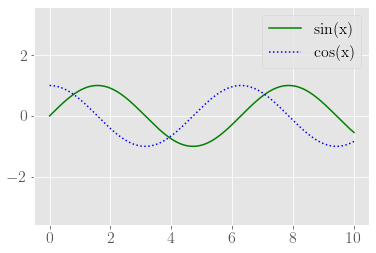

In [ ]:
# 图例
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend()

上图可见，plt.legend()函数绘制的图例线条与图中的折线无论风格和颜色都保持一致。查阅plt.legend文档字符串可以获得更多相关信息；我们在[自定义图表图例]一节中也会讨论更高级的图例应用。

### 额外内容：Matplotlib 的坑
虽然大多数的plt函数都可以直接转换为ax的方法进行调用（例如plt.plot() → ax.plot()，plt.legend() → ax.legend()等），但是并不是所有的命令都能应用这种情况。特别是用于设置极值、标签和标题的函数都有一定的改变。下表列出了将 MATLAB 风格的函数转换为面向对象的方法的区别：
    - plt.xlabel() → ax.set_xlabel()
    - plt.ylabel() → ax.set_ylabel()
    - plt.xlim() → ax.set_xlim()
    - plt.ylim() → ax.set_ylim()
    - plt.title() → ax.set_title()
在面向对象接口中，与其逐个调用上面的方法来设置属性，更常见的使用ax.set()方法来一次性设置所有的属性：

[(0.0, 10.0),
 (-2.0, 2.0),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'sin(x)'),
 Text(0.5, 1.0, 'A Simple Plot')]

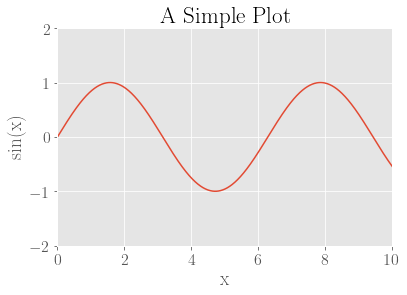

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot')

## 2.简单散点图
另一种常用的图表类型是简单散点图，它是折线图的近亲。不像折线图，图中的点连接起来组成连线，散点图中的点都是独立分布的点状、圆圈或其他形状。

### 使用 plt.plot 绘制散点图

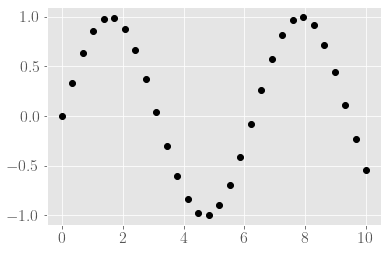

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black')

传递给函数的第三个参数是使用一个字符代表的图表绘制点的类型。就像你可以使用'-'或'--'来控制线条的风格那样，点的类型风格也可以使用短字符串代码来表示。所有可用的符号可以通过plt.plot文档或 Matplotlib 在线文档进行查阅。大多数的代码都是非常直观的，我们使用下面的例子可以展示那些最通用的符号：

(0.0, 1.8)

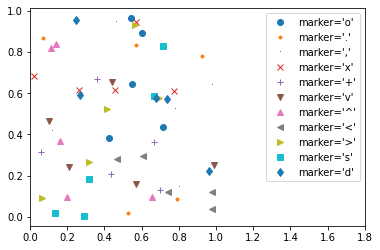

In [ ]:
# 不同的图表绘制点类型参数'marker'
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8)

而且这些符号代码可以和线条、颜色代码一起使用，这会在折线图的基础上绘制出散点：

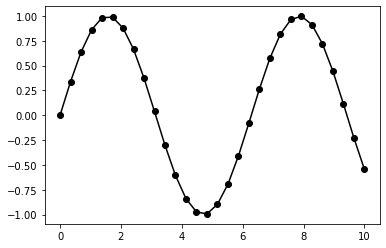

In [ ]:
# 在折线图的基础上绘制出散点
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, '-ok')

plt.plot还有很多额外的关键字参数用来指定广泛的线条和点的属性：

(-1.2, 1.2)

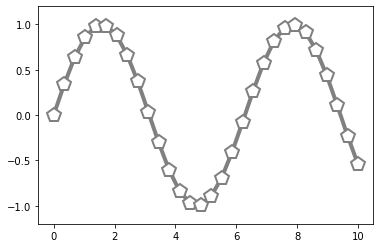

In [ ]:
# 其他指定广泛的线条和点的属性的参数
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2)

plt.plot函数的这种灵活性提供了很多的可视化选择。查阅plt.plot帮助文档获得完整的选项说明。

### 使用plt.scatter绘制散点图

第二种更强大的绘制散点图的方法是使用plt.scatter函数，它的使用方法和plt.plot类似：

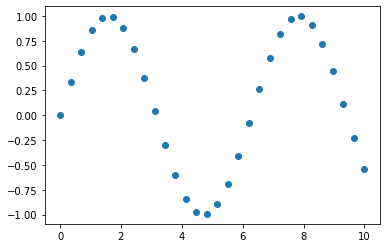

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.scatter(x, y, marker='o')

plt.scatter和plt.plot的主要区别在于，plt.scatter可以针对每个点设置不同属性（大小、填充颜色、边缘颜色等），还可以通过数据集合对这些属性进行设置。让我们通过一个随机值数据集绘制不同颜色和大小的散点图来说明。为了更好的查看重叠的结果，我们还使用了alpha关键字参数对点的透明度进行了调整：

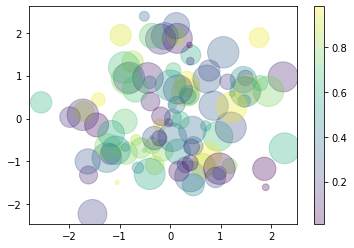

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 30)
y = np.sin(x)

rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar()  # 显示颜色对比条

注意图表右边有一个颜色对比条（这里通过colormap()函数输出），图表中的点大小的单位是像素。使用这种方法，散点的颜色和大小都能用来展示数据信息，在希望展示多个维度数据集合的情况下很直观。

例如，当我们使用 Scikit-learn 中的鸢尾花数据集，里面的每个样本都是三种鸢尾花中的其中一种，并带有仔细测量的花瓣和花萼的尺寸数据：

Text(0, 0.5, 'sepal width (cm)')

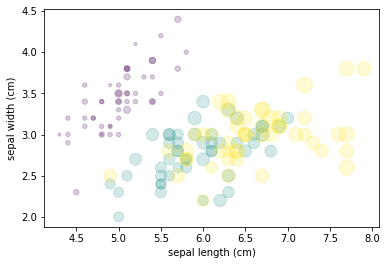

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

我们可以从下图中看出，可以通过散点图同时展示该数据集的四个不同维度：图中的(x, y)位置代表每个样本的花萼的长度和宽度，散点的大小代表每个样本的花瓣的宽度，而散点的颜色代表一种特定的鸢尾花类型。如上图的多种颜色和多种属性的散点图对于我们分析和展示数据集时都非常有帮助

### plot 和 scatter 对比：性能提醒
除了上面说的plt.plot和plt.scatter对于每个散点不同属性的支持不同之外，还有别的因素影响对这两个函数的选择吗？对于小的数据集来说，两者并无差别，当数据集增长到几千个点时，plt.plot会明显比plt.scatter的性能要高。造成这个差异的原因是plt.scatter支持每个点使用不同的大小和颜色，因此渲染每个点时需要完成更多额外的工作。而plt.plot来说，每个点都是简单的复制另一个点产生，因此对于整个数据集来说，确定每个点的展示属性的工作仅需要进行一次即可。对于很大的数据集来说，这个差异会导致两者性能的巨大区别，因此，对于大数据集应该优先使用plt.plot函数。

## 3.误差可视化
对于任何的科学测量来说，精确计算误差与精确报告测量值基本上同等重要，如果不是更加重要的话。例如，设想我正在使用一些天文物理学观测值来估算哈勃常数，即本地观测的宇宙膨胀系数。我从一些文献中知道这个值大概是71(km/s)/Mpc，而我测量得到的值是74(km/s)/Mpc,。这两个值是否一致？在仅给定这些数据的情况下，这个问题的答案是，无法回答。

如果我们将信息增加一些，给出不确定性：最新的文献表示哈勃常数的值大约是71±2.5(km/s)/Mpc，我的测量值是74±5(km/s)/Mpc。这两个值是一致的吗？这就是一个可以准确回答的问题了。

在数据和结果的可视化中，有效地展示这些误差能使你的图表涵盖和提供更加完整的信息。

### 基础误差条

<ErrorbarContainer object of 3 artists>

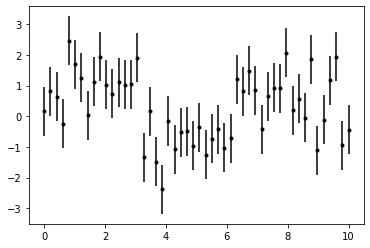

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k') # 这里的fmt参数是用来控制线条和点风格的代码，与plt.plot有着相同的语法.

<ErrorbarContainer object of 3 artists>

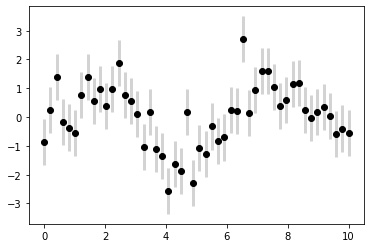

In [ ]:
# errorbar函数还有很多参数可以用来精细调节图表输出。使用这些参数你可以很容易的个性化调整误差条的样式。作者发现通常将误差线条颜色调整为浅色会更加清晰，特别是在数据点比较密集的情况下：
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)
# 除了上面介绍的参数，你还可以指定水平方向的误差条（xerr），单边误差条和其他很多的参数。

### 连续误差

(0.0, 10.0)

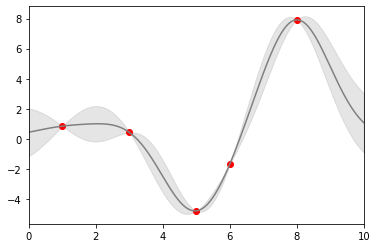

In [ ]:
# 在某些情况下可能需要对连续值展示误差条。虽然 Matplotlib 没有內建的函数能直接完成这个任务，但是你可以通过简单将plt.plot和plt.fill_between函数结合起来达到目标。
# 这里我们会采用简单的高斯过程回归方法，Scikit-Learn 提供了 API。这个方法非常适合在非参数化的函数中获得连续误差。我们在这里不会详细介绍高斯过程回归，仅仅聚焦在如何绘制连续误差本身：
# 译者注：新版的 sklearn 修改了高斯过程回归实现方法，下面代码做了相应修改。
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor

# 定义模型和一些符合模型的点
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 计算高斯过程回归，使其符合 fit 数据点
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * std  # 两倍sigma ~ 95% 确定区域


#我们现在有了xfit、yfit和dyfit，作为对我们数据的连续拟合值以及误差限。当然我们也可以像上面一样使用plt.errorbar绘制误差条，但是事实上我们不希望在图标上绘制 1000 个点的误差条。于是我们可以使用plt.fill_between函数在误差限区域内填充一道浅色的误差带来展示连续误差：

# 可视化结果
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10)

# 注意上面我们调用fill_between函数：我们传递了的参数包括 x 值，y 值的低限，然后是 y 值的高限，结果是图表中介于低限和高限之间的区域会被填充。
# 下图为我们提供了一个非常直观的高斯过程回归展示：在观测点的附近，模型会被限制在一个很小的区域内，反映了这些数据的误差比较小。在远离观测点的区域，模型开始发散，反映了这时的数据误差比较大。
# 如果需要获得plt.fill_between（以及类似的plt.fill函数）更多参数的信息，请查阅函数的帮助文档或 Matplotlib 在线文档。

## 4.密度和轮廓图
有些情况下，我们需要在二维图表中使用轮廓或颜色区域来展示三维的数据（可以设想等高线地图或温度分布图）。Matplotlib 提供了三个有用的函数来处理这项任务：plt.contour绘制轮廓图，plt.contourf来绘制填充区域颜色的图表以及plt.imshow来展示图像。本节会介绍几个使用它们的例子。

### 三维可视化函数

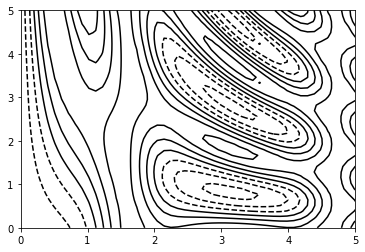

In [ ]:
# 轮廓图可以使用plt.contour函数进行创建。它接收三个参数：x参数代表三维网格的平面横轴坐标，y参数代表三维网格的平面纵轴坐标，而z参数代表三维网格的高度坐标。最容易用来准备这种网格数据的是np.meshgrid函数，可以将两个一维的数组构造成一个二维的网格.
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)


x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, colors='black')

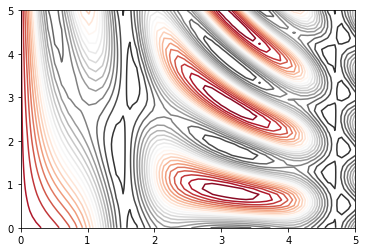

In [ ]:
# 图中值得注意的是，当使用单色绘制轮廓图时，虚线代表的是负数的数值，而实线代表的是正数。而轮廓线可以通过指定cmap参数来设置线条的色图。下例中展示了使用色图且绘制了更多的轮廓线的例子，会在整个数据范围区域内等距分布有 20 条轮廓线.
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, 20, cmap='RdGy')
# 该例中我们选择了RdGy（Red-Gray的缩写）色图，这对于聚集的数据来说是一个不错的选择

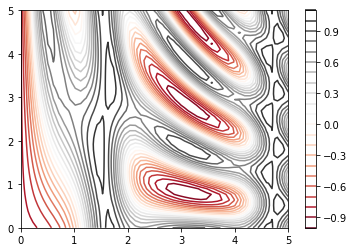

In [ ]:
# 上面的图看起来比第一幅图好多了，但是线条之间的空隙还是有点让人混淆。我们可以将上面的图改为填充轮廓图来解决这个问题，使用plt.contourf()函数（注意函数名最后有个 f，代表填充 fill），这个函数的语法基本上与plt.contour()保持一致。并且我们加上了plt.colorbar()函数，这个函数会在图表边上创建一个颜色图例用以展示颜色所表示的数值区域：

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

TypeError: axis() got an unexpected keyword argument 'aspect'

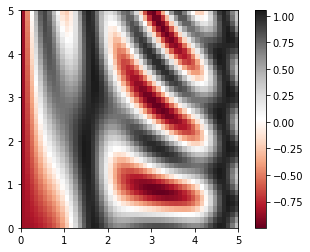

In [ ]:
# 上图有一个缺点，那就是图中颜色的阶梯是离散的而不是连续的，这通常不是我们想要的。我们可以通过设置很高的轮廓线数量来改善，但是这会导致绘制图表的性能降低：Matplotlib 必须在每个颜色阶梯上绘制一条新的轮廓多边形。更好的办法是使用plt.imshow()函数，它会将一个二维的网格图表转换为一张图像。

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image')

然而，在使用imshow()的时候也有一些坑：

- plt.imshow()不接受 x 和 y 网格值作为参数，因此你需要手动指定extent参数[xmin, xmax, ymin, ymax]来设置图表的数据范围。
- plt.imshow()使用的是默认的图像坐标，即左上角坐标点是原点，而不是通常图表的左下角坐标点。这可以通过设置origin参数来设置。
- plt.imshow()会自动根据输入数据调整坐标轴的比例；这可以通过参数来设置，例如，plt.axis(aspect='image')能让 x 和 y 轴的单位一致。

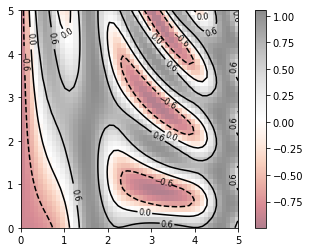

In [ ]:
# 最后，有时可能需要将轮廓图和图像结合起来。例如，下例中我们使用了半透明的背景图像（通过alpha参数设置透明度），然后在背景图层之上绘制了轮廓图，并带有每个轮廓的数值标签（使用plt.clabel()函数绘制标签）：

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar()

通过组合使用plt.contour、plt.contourf和plt.imshow这三个函数，基本可以满足我们绘制所有这种在二维图标上的三维数据的需求。需要了解更多函数的参数信息，参考它们的文档字符串。

## 5.直方图，分桶和密度
一个简单的直方图可以是我们开始理解数据集的第一步。前面我们看到了 Matplotlib 的直方图函数，我们可以用一行代码绘制基础的直方图.

(array([  2.,  14.,  41., 159., 264., 254., 173.,  71.,  19.,   3.]),
 array([-3.62139449, -2.9061639 , -2.19093331, -1.47570272, -0.76047213,
        -0.04524154,  0.66998905,  1.38521964,  2.10045023,  2.81568081,
         3.5309114 ]),
 <BarContainer object of 10 artists>)

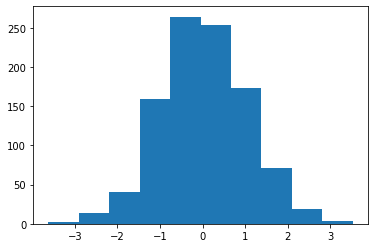

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.randn(1000)

plt.hist(data)

hist()函数有很多的参数可以用来调整运算和展示；下面又一个更加个性化的直方图展示：

译者注：normed 参数已经过时，此处对代码进行了相应修改，使用了替代的 density 参数。

(array([0.00964089, 0.00482045, 0.00964089, 0.01446134, 0.04338401,
        0.07712713, 0.06748624, 0.13497248, 0.20727917, 0.19763828,
        0.20245873, 0.33261077, 0.33261077, 0.3470721 , 0.39527656,
        0.37599478, 0.46758325, 0.32296987, 0.36635389, 0.2313814 ,
        0.20727917, 0.14461338, 0.13015204, 0.09158847, 0.03856357,
        0.01928178, 0.02410223, 0.00964089, 0.00964089, 0.00482045]),
 array([-3.1209816 , -2.91353191, -2.70608222, -2.49863253, -2.29118284,
        -2.08373315, -1.87628347, -1.66883378, -1.46138409, -1.2539344 ,
        -1.04648471, -0.83903502, -0.63158533, -0.42413564, -0.21668596,
        -0.00923627,  0.19821342,  0.40566311,  0.6131128 ,  0.82056249,
         1.02801218,  1.23546187,  1.44291155,  1.65036124,  1.85781093,
         2.06526062,  2.27271031,  2.48016   ,  2.68760969,  2.89505938,
         3.10250906]),
 [<matplotlib.patches.Polygon at 0x1d811cd4d48>])

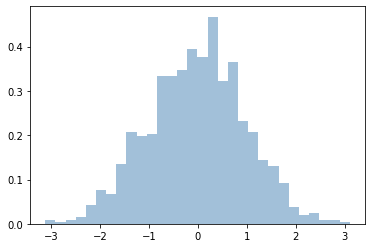

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.randn(1000)

plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')

(array([0.00300272, 0.        , 0.        , 0.00300272, 0.00600543,
        0.00600543, 0.01201086, 0.00600543, 0.00900815, 0.03302987,
        0.03302987, 0.04804344, 0.09308417, 0.08107331, 0.10809775,
        0.14713304, 0.1591439 , 0.18316563, 0.20418463, 0.20418463,
        0.17415748, 0.19217377, 0.22520364, 0.16815205, 0.1771602 ,
        0.14713304, 0.12611404, 0.10209232, 0.10209232, 0.0600543 ,
        0.06605973, 0.03302987, 0.03302987, 0.01201086, 0.00900815,
        0.00600543, 0.01501358, 0.00600543, 0.00600543, 0.00300272]),
 array([-3.95718714, -3.62415523, -3.29112331, -2.95809139, -2.62505947,
        -2.29202755, -1.95899563, -1.62596371, -1.29293179, -0.95989988,
        -0.62686796, -0.29383604,  0.03919588,  0.3722278 ,  0.70525972,
         1.03829164,  1.37132356,  1.70435547,  2.03738739,  2.37041931,
         2.70345123,  3.03648315,  3.36951507,  3.70254699,  4.03557891,
         4.36861082,  4.70164274,  5.03467466,  5.36770658,  5.7007385 ,
         6.03377

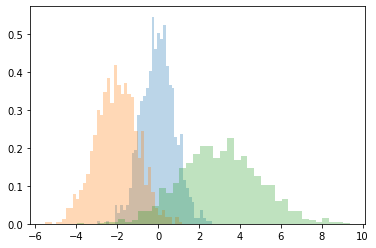

In [ ]:
# plt.hist文档中有更多关于个性化参数的信息。作者发现联合使用histtype='stepfilled'和alpha参数设置透明度在对不同分布的数据集进行比较展示时很有用：
import numpy as np
import matplotlib.pyplot as plt

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [ ]:
# 如果你只是需要计算直方图的数值（即每个桶的数据点数量）而不是展示图像，np.histogram()函数可以完成这个目标
import numpy as np

data = np.random.randn(1000)

counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 32 320 525 117   6]


### 二维直方图和分桶
正如前面我们可以在一维上使用数值对应的直线划分桶一样，我们也可以在二维上使用数据对应的点来划分桶。本节我们介绍几种实现的方法。

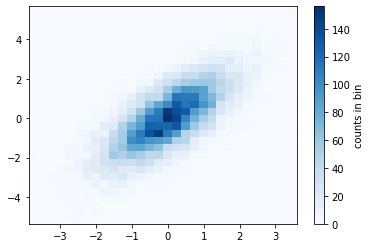

In [ ]:
# plt.hist2d：二维直方图
# 首先定义数据集，从多元高斯分布中获得x和y数组：
import numpy as np

mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

# 绘制二维直方图最直接的方法是使用 Matplotlib 的plt.hist2d函数
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')
# 类似plt.hist，plt.hist2d有许多额外的参数来调整分桶计算和图表展示，可以通过文档了解更多信息。而且，plt.hist有np.histogram，plt.hist2d也有其对应的函数np.histogram2d。如果要获得更高维度的分桶结果，参见np.histogramdd函数文档。

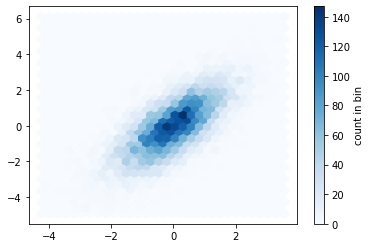

In [ ]:
# plt.hexbin：六角形分桶
# 刚才的二维分桶是沿着坐标轴将每个桶分为正方形。另一个很自然的分桶形状就是正六边形。对于这个需求，Matplotlib 提供了plt.hexbin函数，它也是在二维平面上分桶展示，不过每个桶（即图表上的每个数据格）将会是六边形：
import numpy as np

mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')
# plt.hexbin有许多有趣的参数，包括能对每个点设置权重和将每个桶的输出数据结果改为任意的 NumPy 聚合结果（带权重的平均值，带权重的标准差等）。

### 核密度估计
另外一个常用来统计多维数据密度的工具是核密度估计（KDE）。这目前我们只需要知道 KDE 被认为是一种可以用来填补数据的空隙并补充上平滑变化数据的方法就足够了。快速和简单的 KDE 算法已经在scipy.stats模块中有了成熟的实现。下面我们就一个简单的例子来说明如何使用 KDE 和绘制相应的二维直方图.

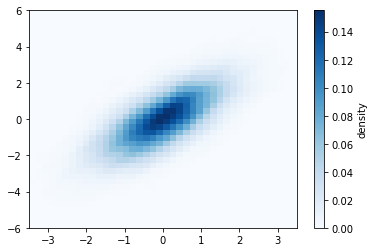

In [ ]:
from scipy.stats import gaussian_kde

# 产生和处理数据，初始化KDE
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 在通用的网格中计算得到Z的值
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 将图表绘制成一张图像
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE 有着光滑的长度，可以在细节和光滑度中有效的进行调节（一个例子是方差偏差权衡）。这方面有大量的文献介绍：高斯核密度估计gaussian_kde使用了经验法则来寻找输入数据附近的优化光滑长度值。

其他的 KDE 实现也可以在 SciPy 中找到，每一种都有它的优点和缺点；参见sklearn.neighbors.KernelDensity和statsmodels.nonparametric.kernel_density.KDEMultivariate。要绘制基于 KDE 进行可视化的图表，Matplotlib 写出的代码会比较冗长。

## 6.自定义图标图例
图例可以为可视化赋予实际含义，为不同的图标元素附上明确说明。我们前面看到了一些简单的图例创建例子；本小节中我们来介绍一下在 Matplotlib 中自定义图例的位置和进行美化的方法。

### plt.legend()创建最简单的图例

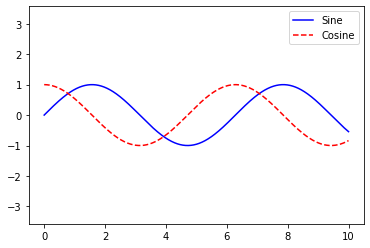

In [ ]:
# 可以使用plt.legend()函数来创建最简单的图例，这个函数能自动创建任何带有标签属性的图表元素的图例
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

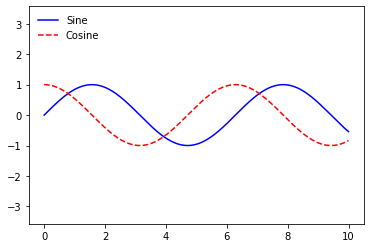

In [ ]:
# 但除此之外还有很多能自定义图例的方法。例如，我们可以指定图例位置并且去除边框：
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
ax.legend(loc='upper left', frameon=False)

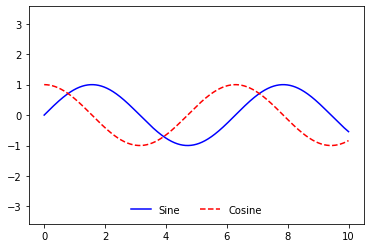

In [ ]:
# 我们可以使用ncol属性设置图例中每行的列数
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
ax.legend(frameon=False, loc='lower center', ncol=2)

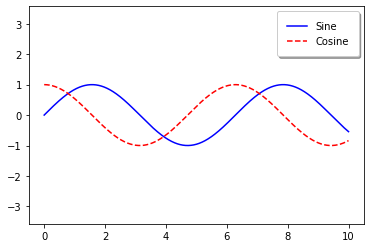

In [ ]:
# 还可以使用圆角方框（fancybox）或者增加阴影，设置方框的透明度（alpha 值）或修改文字的边距：
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

# 如果jupyter是黑背景, 图例的框可能看不出来.

### 选择设置图例的元素
正如我们前面例子所示，绘制的图例默认包括所有带标签的元素。如果这不是想要的效果，我们可以调整哪些元素和标签会出现在图例当中，这可以通过设置 plot 函数或方法返回的对象实现。plt.plot函数能够同时产生多条折线，然后将这些线条的实例列表返回。将其中的部分实例传递到plt.legend()函数就能设置哪些线条会出现在图例中，再通过一个标签的列表指定图例的名称

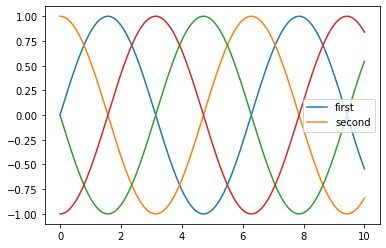

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines是一个线条实例的列表
plt.legend(lines[:2], ['first', 'second'])

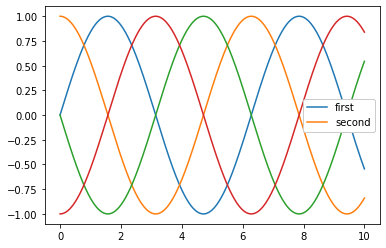

In [ ]:
# 作者更加倾向于使用第一种方式，因为更加清晰。通过将标签应用在图表元素上，然后绘制到图例中：
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))

plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True)

# 请注意默认情况下，legend会忽略所有不带标签的元素.

### 散点大小的图例
某些情况下默认的图例不足以满足特定的可视化需求。例如，你在使用散点的大小来标记数据的某个特征，然后希望创建一个相应的图例。下面的例子是加州城市人口的散点图，我们使用散点的大小表现该城市的面积，散点的颜色来表现城市的人口数量（自然对数值）。我们希望使用一个图例来指明散点尺寸的比例，同时用一个颜色条来说明人口数量，我们可以通过自定义绘制一些标签数据来实现尺寸图例：

译者注：新版 Matplotlib 已经取消 aspect 参数，此处改为使用新的'scaled'参数调用 axis 函数。

Text(0.5, 1.0, 'California Cities: Area and Population')

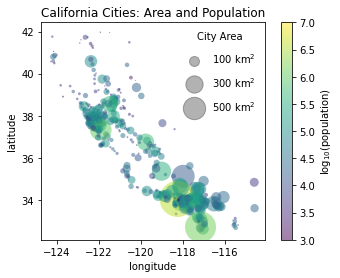

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cities = pd.read_csv(r'data\california_cities.csv')

# 提取我们感兴趣的数据
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# 绘制散点图，使用尺寸代表面积，颜色代表人口，不带标签
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('scaled')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# 下面我们创建图例：
# 使用空列表绘制图例中的散点，使用不同面积和标签，带透明度
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population')

之前的图例都关联着图表上的一些对象，因此如果我们需要展示图例的话我们首先需要绘制图表元素。在上例中，我们需要的图例对象（灰色圆圈）不在图表上，因此我们采用绘制空列表的方式将它们仿造在图表上（实际上图上没有点），但是还是需要注意，只有那些带标签的元素才会出现在图例中。

通过绘制空列表，我们创建了三个带标签的对象，然后就可以出现在图例当中，这个图例就能表示出有关城市面积的相关信息。这个策略在很多复杂可视化图表构建过程中都被用到。

最后我们注意到这个图表实际上是一个地理位置图表，如果我们能在上面绘制州界线或其他地图相关的元素的话，会更加清晰。Matplotlib 提供了一个 Basemap 额外工具集来实现这个目标。

### 多重图例
有时候我们可能需要在同一个图表维度中设计多个图例。不幸的是，Matplotlib 并没有提供很简单的方式实现：通过标准的legend接口，只能在整张图表上创建一个图例。如果你试图使用plt.legend()或ax.legend()创建第二个图例，那么第二条语句创建的图例会覆盖第一条语句创建的。我们只能通过从底层开始来创建一个新的图例 artist 这种方法来解决这个问题，然后使用ax.add_artist()的底层方法手动将第二个作者加到图表上：

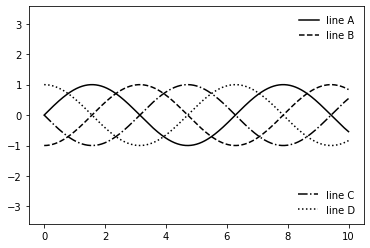

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# 指定第一个图例的线条和标签
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# 手动创建第二个图例，并将作者添加到图表中
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg)

上例展示了用来组成任何 Matplotlib 图表的底层 artist 对象的简单说明。如果你去查看ax.legend()的源代码（你可以通过 IPython 的ax.legend??帮助工具做到），你可以看到这个方法包含了用来构建合适Legend的 artist 对象的逻辑，构建的对象被保存在legend_属性当中，当绘制时被添加到图表上进行展示。

## 7.个性化颜色条
图例可以将离散的点标示为离散的标签。对于建立在不同颜色之上的连续的值（点线面）来说，标注了的颜色条是非常方便的工具。Matplotlib 的颜色条是独立于图表之外的一个类似于比色卡的图形，用来展示图表中不同颜色的数值含义。因为本书是使用黑白打印的，本节内容中的所有带色彩的图都可以在(https://github.com/wangyingsm/Python-Data-Science-Handbook)中找到。

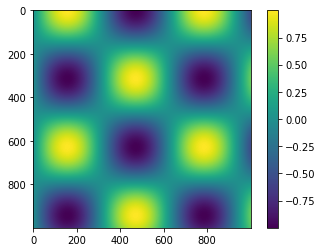

In [ ]:
# 通过plt.colorbar函数可以创建最简单的颜色条，在本节中我们会多次看到：

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

我们下面来讨论如何个性化颜色条以及在不同的场合高效的使用它们。

### 自定义颜色条

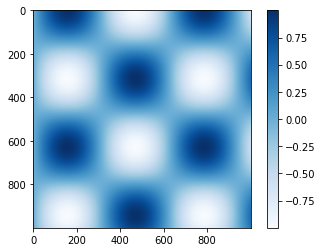

In [ ]:
# 颜色条可以通过cmap参数指定使用的色谱系统（或叫色图）
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I, cmap='Blues') # 所有可用的色图都可以在plt.cm模块中找到
plt.colorbar()

### 选择色图
在可视化方案中选择颜色完整的介绍说明超出了本书的范围，如果你对这个课题和相关内容有兴趣，可以参考文章["绘制更漂亮图表的 10 个简单规则"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)。

通常来说，你应该注意以下三种不同类型的色图：
    - 序列色图：这类型的色谱只包括一个连续序列的色系（例如binary或viridis）。
    - 分化色图：这类型的色谱包括两种独立的色系，这两种颜色有着非常大的对比度（例如RdBu或PuOr）。
    - 定性色图：这类型的色图混合了非特定连续序列的颜色（例如rainbow或jet）。
jet色图，在 Matplotlib 2.0 版本之前都是默认的色图，是定性色图的一个例子。jet作为默认色图的位置其实有点尴尬，因为定性图通常都不是对定量数据进行展示的好选择。原因是定性图通常都不能在范围增加时提供亮度的均匀增长。

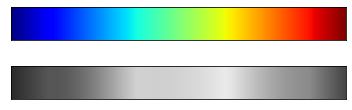

In [ ]:
# 我们可以通过将jet颜色条转换为黑白来看到这点：

from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """返回给定色图的灰度版本"""
    cmap = plt.cm.get_cmap(cmap) # 使用名称获取色图对象
    colors = cmap(np.arange(cmap.N)) # 将色图对象转为RGBA矩阵，形状为N×4

    # 将RGBA颜色转换为灰度
    # 参考 http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114] # RGB三色的权重值
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight)) # RGB平方值和权重的点积开平方根
    colors[:, :3] = luminance[:, np.newaxis] # 得到灰度值矩阵
    # 返回相应的灰度值色图
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)


def view_colormap(cmap):
    """将色图对应的灰度版本绘制出来"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))

    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

view_colormap('jet')

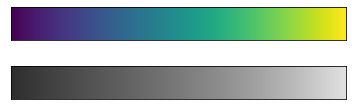

In [ ]:
# 注意一下上面的灰度图中亮条纹的位置。即使在上述彩色图中，也出现了这种不规则的亮条纹，这会导致眼睛被区域中亮条纹所吸引，这很可能造成阅读者被不重要的数据集部分干扰了。更好的选择是使用类似viridis这样的色图（Matplotlib 2.0 后默认色图），它们被设计为有着均匀的亮度变化。因此它们无论是在彩色图中还是在灰度图中都有着同样的亮度变化：
view_colormap('viridis')

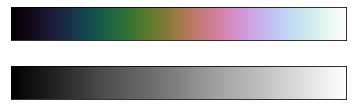

In [ ]:
# 如果你更喜欢彩虹方案，另一个好的选择是使用cubehelix色图：
view_colormap('cubehelix')

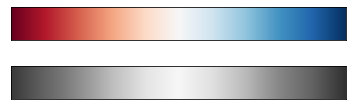

In [ ]:
# 对于其他的情况，例如某种正负分布的数据集，双色颜色条如RdBu（Red-Blue）会很常用。然而正如你从下面例子看到的，如果将双色颜色条转化为灰度的话，正负或两级的信息就会丢失：
view_colormap('RdBu')

Matplotlib 中有大量可用的色图；要看到它们的列表，你可以使用 IPython 来探索plt.cm模块。要在 Python 中更加正规的使用颜色，你可以查看 Seaborn 库的工具和文档。

### 颜色限制和扩展
Matplotlib 允许你对颜色条进行大量的自定义。颜色条本身就是一个plt.Axes对象，因此所有轴和刻度定制的技巧都可以应用在上面。颜色条也有着一些有趣的自定义行为：例如，我们可以缩小颜色的范围并且通过设置extend参数将超出范围之外的数值展示为顶部和底部的三角箭头形状。这对于展示一些受到噪声干扰的数据时非常方便：

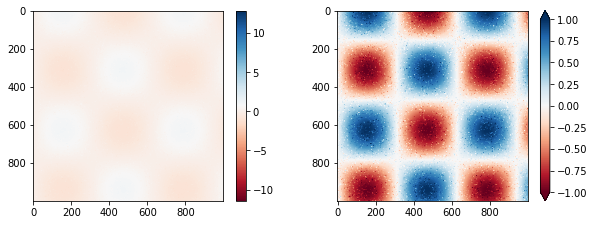

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 在I数组中人为生成不超过1%的噪声
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))
# 不考虑去除噪声时的颜色分布
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()
# 设置去除噪声时的颜色分布
plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

注意到在左边的图表中，默认的颜色阈值是包括了噪声的，因此整体的条纹形状都被噪声数据冲刷淡化了。而右边的图表，我们手动设置了颜色的阈值，并在绘制颜色条是加上了extend参数来表示超出阈值的数据。对于我们的数据来说，右图比左图要好的多。

### 离散颜色条
色图默认是连续的，但是在某些情况下你可能需要展示离散值。最简单的方法是使用plt.cm.get_cmap()函数，在传递某个色图名称的同时，还额外传递一个颜色分桶的数量值参数给该函数：

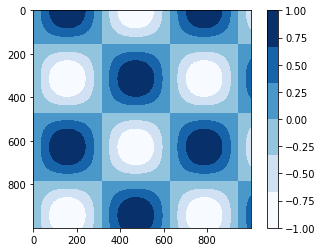

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

离散色图的使用方式和其他色图没有任何区别。

### 例子：手写数字
最后我们来看一个很有实用价值的例子，让我们实现对一些手写数字图像数据的可视化分析。这个数据包含在 Sciki-Learn 中，以供包含有将近 2,000 张8*8不同笔迹的手写数字缩略图。

首先，我们下载这个数据集，然后使用plt.imshow()将其中部分数据展示出来：

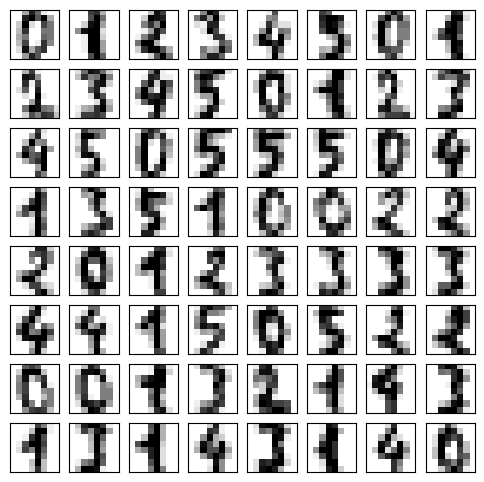

In [2]:
# 读取数字0-5的手写图像，然后使用Matplotlib展示头64张缩略图
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

因为每个数字都是使用 64 个像素点渲染出来的，我们可以认为每个数字是一个 64 维空间中的点：每个维度代表这其中一个像素的灰度值。但是要在图表中将这么高维度空间的联系可视化出来是非常困难的。有一种做法是使用降维技术，比方说使用流形学习来减少数据的维度然而不会丢失数据中有效的信息。

我们来看一下将这些手写数字图像数据映射到二维流形学习当中：

d:\programme\python\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\programme\python\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


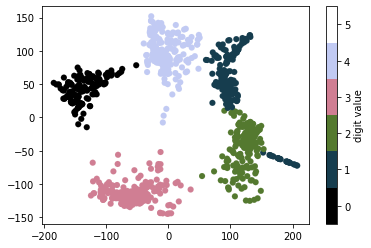

In [ ]:
# 使用Isomap将手写数字图像映射到二维流形学习中
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

# 我们使用离散颜色条来展示结果，设置ticks和clim来进一步美化结果的颜色条：
# 绘制图表结果
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

我们从流形学习中的映射中可以观察到一些有趣现象：例如，图表中 5 和 3 有一些重叠的部分，这表示一些手写体中 5 和 3 是比较难以辨别的，因此对于自动识别算法来说这是比较容易混淆的部分。而 0 和 1，它们在图表中距离很远，这表示两者比较容易辨别，不太可能造成混淆。这个图表分析与我们的直觉一致，因为 5 和 3 显然比 0 和 1 看起来更加接近。

## 8.多个子图表
在一些情况中，如果能将不同的数据图表并列展示，对于我们进行数据分析和比较会很有帮助。Matplotlib 提供了子图表的概念来实现这一点：单个图表中可以包括一组小的 axes 用来展示多个子图表。这些子图表可以是插图，网格状分布或其他更复杂的布局。在本节中我们会介绍 Matplotlib 中用来构建子图表的四个函数。

### plt.axes：手动构建子图表
构建 axes 作为子图表的最基础方法就是使用plt.axes函数。正如我们前面已经看到，默认情况下，这个函数够创建一个标准的 axes 对象填满整个图表区域。plt.axes函数也可以接收一个可选的列表参数用来指定在 axes 在整个图表中的坐标点位置。列表中有四个数值分别为[left, bottom, width, height]（取值都是 0-1），代表着子图表的左边、底部、宽度、高度在整个图表中左边、底部、宽度、高度所占的比例值。

例如，我们可以在距离左边和底部 65%的位置，以插图的形式放置一个宽度和高度都是 20%子图表，上述数值应该为[0.65, 0.65, 0.2, 0.2]：

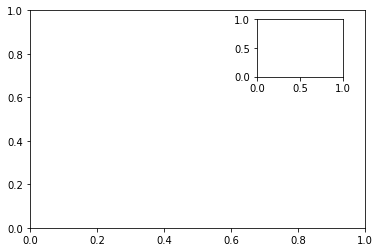

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ax1 = plt.axes()  # 标准图表
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) #子图表

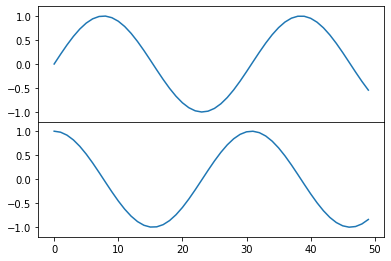

In [ ]:
# 与上述等价的面向对象接口的语法是fig.add_axes()。我们使用这个方法来创建两个垂直堆叠的子图表：
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure() # 获得figure对象
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2)) # 左边10% 底部50% 宽80% 高40%
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2)) # 左边10% 底部10% 宽80% 高40%

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

这样我们就有两个子图表（上面的子图表没有 x 轴刻度），这两个子图表正好吻合：上面图表的底部是整个图表高度 50%位置，而下面图表的顶部也是整个图表的 50%位置（0.1+0.4）。

### plt.subplot：简单网格的子图表
将子图表的行与列对齐是一个很常见的需求，因此 Matplotlib 提供了一些简单的函数来实现它们。这些函数当中最底层的是plt.subplot()，它会在网格中创建一个子图表。函数接受三个整数参数，网格行数，网格列数以及该网格子图表的序号（从左上角向右下角递增）：

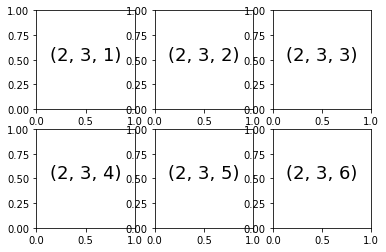

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

plt.subplots_adjust函数用来调整这些子图表之间的距离。下面的代码使用了与plt.subplot()等价的面向对象接口方法fig.add_subplot()：

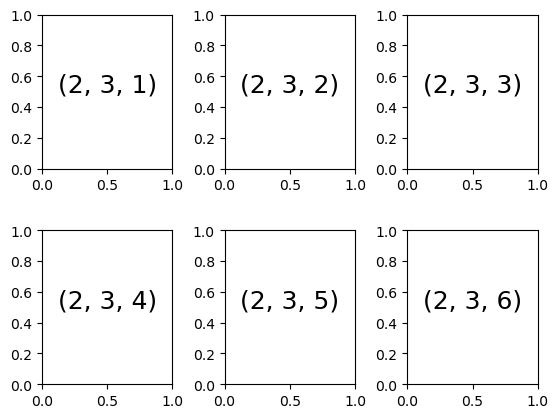

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

上例中我们指定了plt.subplots_adjust函数的hspace和wspace参数，它们代表这沿着高度和宽度方向子图表之间的距离，单位是子图表的大小（在本例中，距离是子图表宽度和高度的 40%）。

### plt.subplots：一句代码设置所有网格子图表
上面的方法当我们需要创建大量的子图表网格时会变得非常冗长乏味，特别是如果我们需要将内部图表 x 轴和 y 轴标签隐藏的情况下。因此，plt.subplots在这种情况下是一个合适的工具（注意末尾有个 s）。这个函数会一次性创建所有的网格子图表，而不是单个网格，并将它们在一个 NumPy 数组中返回。参数是行数和列数，还有两个可选的关键字参数sharex和sharey，可以让你指定不同子图表之间的关联。

下面我们来创建一个  网格的子图表，其中每一行的子图表共享它们的 y 轴，而每一列的子图表共享它们的 x 轴：

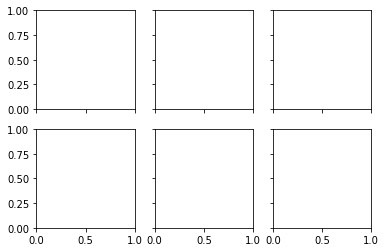

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

注意上面我们设置了sharex和sharey之后，内部子图表的 x 轴和 y 轴的标签就自动被去掉了。返回值中 ax 是一个 NumPy 数组，里面含有每一个子图表的实例，你可以使用 NumPy 索引的语法很简单的获得它们：

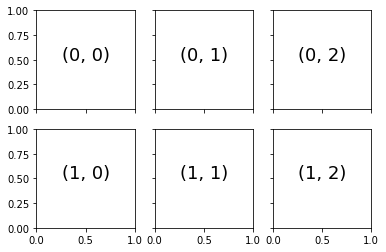

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

# axes是一个2×3的数组，可以通过[row, col]进行索引访问
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
# fig

并且相对于plt.subplot，plt.subplots()更复合 Python 从 0 开始进行索引的习惯。

### plt.GridSpec：更复杂的排列
当你需要子图表在网格中占据多行或多列时，plt.GridSpec()正是你所需要的。plt.GridSpec()对象并不自己创建图表；它只是一个可以被传递给plt.subplot()的参数。例如，一个两行三列并带有指定的宽度高度间隔的 gridspec 可以如下创建：

<AxesSubplot:>

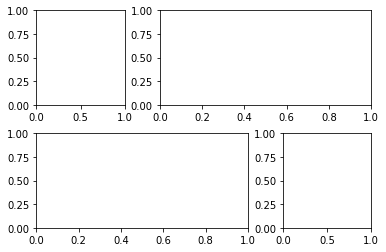

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

# 使用这个对象我们可以指定子图表的位置和占据的网格，仅需要使用熟悉的 Python 切片语法即可：

plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

这种灵活的网格对齐控制方式有着广泛的应用。作者经常在需要创建多个直方图的联合图表中使用这种方法，如下例：

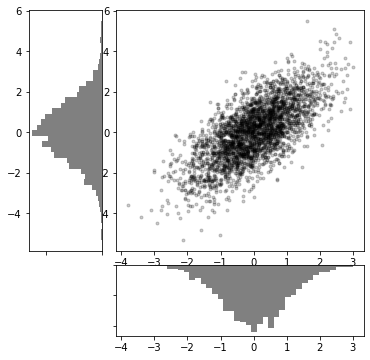

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 构建二维正态分布数据
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# 使用GridSpec创建网格并加入子图表
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 在主图表中绘制散点图
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 分别在x轴和y轴方向绘制直方图
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis() # x轴方向（右下）直方图倒转y轴方向

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis() # y轴方向（左上）直方图倒转x轴方向

这种沿着数据各自方向分布并绘制相应图表的需求是很通用的，因此在 Seaborn 包中它们有专门的 API 来实现

## 9.文本和标注
创建一个优秀的可视化图表的关键在于引导读者，让他们能理解图表所讲述的故事。在一些情况下，这个故事可以通过纯图像的方式表达，不需要额外添加文字，但是在另外一些情况中，图表需要文字的提示和标签才能将故事讲好。也许标注最基本的类型就是图表的标签和标题，但是其中的选项参数却有很多。让我们在本节中使用一些数据来创建可视化图表并标注这些图表来表达这些有趣的信息。

### 例子：节假日对美国出生率的影响

d:\programme\python\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


<AxesSubplot:>

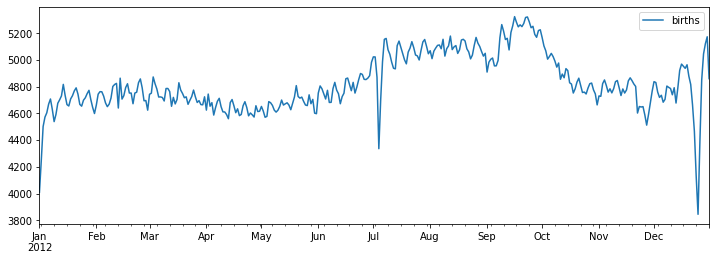

In [ ]:
# 我们先按照前面的方式进行同样的数据清洗程序，然后以图表展示这个结果：
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

births = pd.read_csv(r'data\births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

当我们绘制了这样的图表来表达数据时，如果我们能对一些图表的特性作出标注来吸引读者的注意力通常是非常有帮助的。这可以通过调用plt.text或ax.text函数来实现，它们可以在某个特定的 x，y 轴位置输出一段文字：

d:\programme\python\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


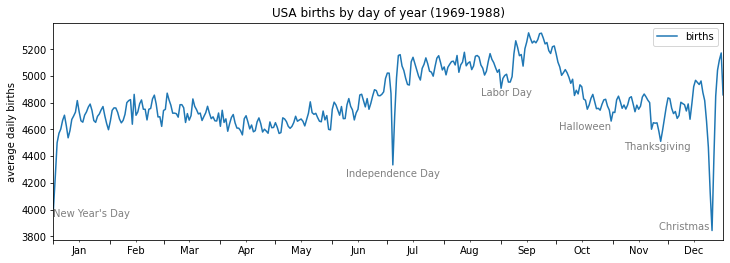

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

births = pd.read_csv(r'data\births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 在折线的特殊位置标注文字
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# 设置标题和y轴标签
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# 设置x轴标签月份居中
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

ax.text方法接收 x 位置、y 位置、一个字符串和额外可选的关键字参数可以用来设置颜色、大小、样式、对齐等文本格式。上面我们使用了ha='right'和ha='center'，这里的ha是*hirizonal alignment（水平对齐）*的缩写。要查阅更多的可用参数，请查看plt.text()和mpl.text.Text()的文档字符串内容。

### 转换和文本位置
在刚才的例子中，我们将文字标注根据数据位置进行了定位。有些时候我们需要将文字标注独立于数据位置而根据图表位置进行定位。Matplotlib 通过转换完成这项工作。

任何的图形显示框架都需要在坐标系统之间进行转换的机制。例如，一个数据点位于$(x,y)=(1,1)$被转换为图表中的某个位置，进而转换为屏幕上显示的像素。这样的坐标转换在数学上都相对来说比较直接，，而且 Matplotlib 提供了一系列的工具实现了转换（这些工具可以在matplotlib.transforms模块中找到）。

一般来说，用户很少需要关注这些转换的细节，但是当考虑将文本在图表上展示时，这些知识却比较有用。在这种情况中，下面三种定义好的转换是比较有用的：
    - ax.transData：与数据坐标相关的转换
    - ax.tranAxes：与 Axes 尺寸相关的转换（单位是 axes 的宽和高）
    - ax.tranFigure：与 figure 尺寸相关的转换（单位是 figure 的宽和高）

下面我们来看看使用这些转换将文字写在图表中不同位置的例子：

Text(0.2, 0.2, '. Figure: (0.2, 0.2)')

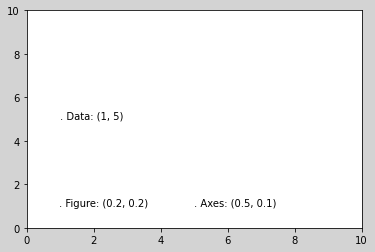

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData是默认的，这里写出来是为了明确对比
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure)

注意默认情况下，文字是在指定坐标位置靠左对齐的：这里每个字符串开始的"."的位置就是每种转换的坐标位置。

transData坐标给定的是通常使用的 x 和 y 轴坐标位置。transAxes坐标给定的是从 axes 左下角开始算起（白色区域）的坐标位置，使用的是宽度和长度的占比。transFigure坐标类似，给定的是从 figure 左下角开始算起（灰色区域）的坐标位置，使用的也是宽度和长度的占比。

因此如果我们改变了轴的最大长度，只有transData坐标会收到影响，其他两个还是保持在相同位置：

(-6.0, 6.0)

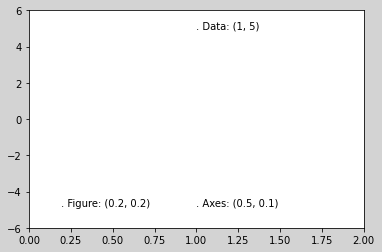

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData是默认的，这里写出来是为了明确对比
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure)

ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)

# fig

这个变化可以通过动态改变轴的最大长度看的更加清楚：如果你在 notebook 执行这段代码，你可以将%matplotlib inline改为%matplotlib notebook，然后使用图表的菜单来交互式的改变图表。

### 箭头和标注
除了刻度标签和文字标签，另一种常用的标注是箭头。

在 Matplotlib 中绘制箭头通常比你想象的难得多。虽然有plt.arrow()函数，作者不建议使用它：这个函数绘制的箭头是一个 SVG 对象，因此在图表使用不同的比例的情况会产生问题，结果通常不能让用户满意。因此，作者建议使用plt.annotate()函数。这个函数会绘制一些文字以及一个箭头，并且箭头可以非常灵活的进行配置。

下面我们提供一些参数来使用annotate函数：

Text(2, -6, 'local minimum')

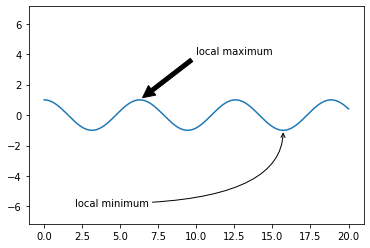

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

箭头的样式是使用箭头属性字典值进行控制的，里面有很多可用的参数。这些参数在 Matplotlib 的在线文档中已经有了很详细的说明，因此在这里就不将这部分内容重复介绍一遍了。我们在前面出生率图上再使用一些参数进行更多的说明：

(3600.0, 5400.0)

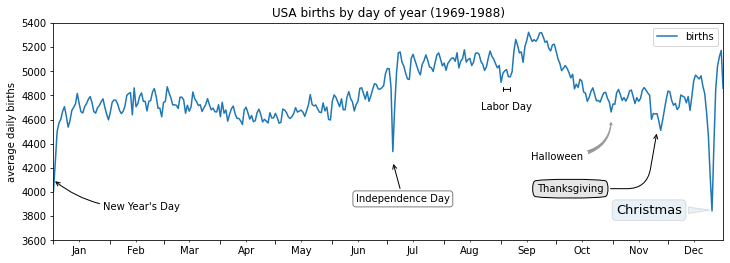

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 为图表添加标注
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# 设置图表标题和坐标轴标记
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# 设置月份坐标居中显示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400)

上图中箭头和文字框都非常详尽了：可以看出你几乎可以使用plt.annotate创建任何你想要的箭头样式。不幸的是，这意味着这种特性都需要手工进行调整，因此如果需要获得印刷质量的图像，这将是一个非常耗费时间的工作。最后，必须指出，上述这种多种样式混合的方式来展现数据肯定不是最佳实践，这里只是为了尽可能多的介绍可用的参数。

更多关于 Matplotlib 的箭头和标注样式的讨论和例子可以访问 Matplotlib gallery.

## 10.自定义刻度
Matplotlib 默认的刻度标志和格式被设计成能满足许多通用场景的需求，但是不会是所有图表的最佳选择。本节会介绍一些调整刻度位置和格式的例子来说明自定义刻度的使用。

在介绍例子之前，我们应该加深对 Matplotlib 图表的对象层次的理解。Matplotlib 的设计目标是展示在图表中的所有内容都会表达成为 Python 的对象：例如，回忆前面我们介绍过figure指的是用来展示图表所有内容的方框。每个 Matplotlib 对象也被设计为其子对象的一个容器：例如figure对象中可以包含一个或多个axes对象，每个axes对象都依次包含着其他用来展示图表的内容对象。

刻度也不例外。每个axes对象都有着属性xaxis和yaxis，表示 x 和 y 轴，其中包含着所有的属性用来指代轴的线、刻度和标签。

### 主要的和次要的刻度
在每个坐标轴上，都有主要的刻度和次要的刻度概念。正如名字指代的，主要刻度通常是大的和更多用到的，而次要刻度通常是小的。默认 Matplotlib 很少使用次要刻度，但是在对数图表中我们可能会看到它们：

在 Matplotlib 2.0 之后，当 axis 的跨度过大时，默认次要刻度将会不再展示，因此，下面的代码经过了修改，加上了 xlim 和 ylim 参数。

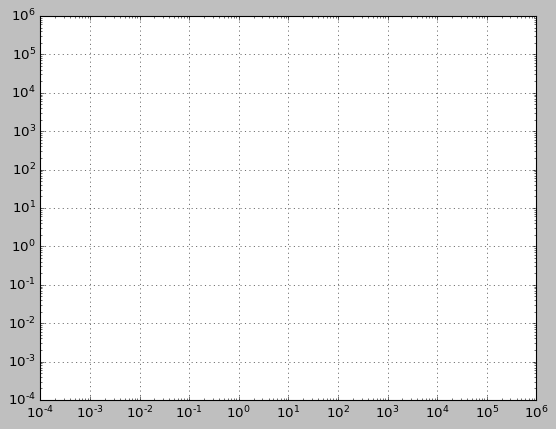

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

ax = plt.axes(xscale='log', yscale='log', xlim=[10e-5, 10e5], ylim=[10e-5, 10e5])
ax.grid()

我们看到每个主要刻度显示了一个大的标志和标签，而每个次要刻度显示了一个小的刻度标志没有标签。

这些刻度属性，位置和标签，都可以使用每个轴的formatter和locator对象进行个性化设置。下面我们来查看一下 x 轴的相应对象：

In [ ]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [ ]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

我们看到主要和次要刻度的位置都是使用LogLocator来设置的（对于对数图表来说那是理所当然的）。然而次要刻度的标签的格式是NullFormatter：这表示次要刻度不会显示标签。

译者注：新版 Matplotlib 已经修改，可以看到 Formatter 都统一成为了 LogFormatterSciNotation，再根据图表实际情况选择是否展示标签。

下面我们就可以开始介绍一些设置这些 locator 和 formatter 的例子了。

### 隐藏刻度和标签
也许最常见的刻度/标签格式设置的操作是隐藏刻度或标签。这可以通过使用plt.NullLocator()和plt.NullFormatter()来设置，如下例：

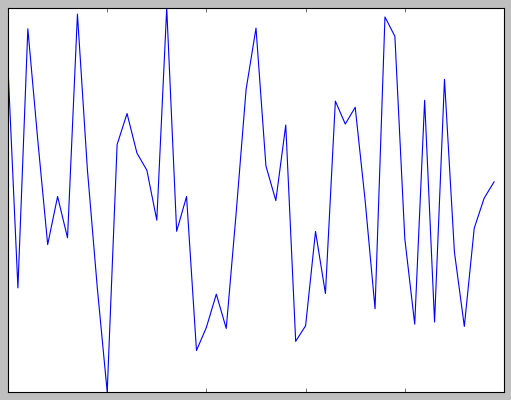

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

注意上图中我们去除了 x 轴的标签（但是保留了刻度或网格线），y 轴的刻度和标签都被去除了。图表中没有刻度和标签在很多情况下很有用，例如，当你希望展示一个图像的网格。比方说，考虑下面的图表，包含着不同的头像，一个很常见的有监督机器学习问题：

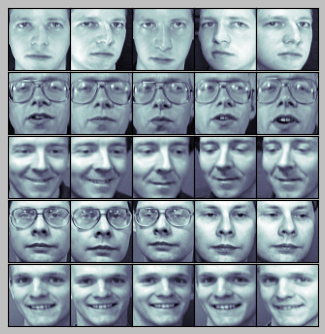

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# 从scikit-learn载入头像数据集
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

注意上图中每张图像都有它自己的 axes，我们将每一个 axes 的 locator 都设置为 null 因为这些刻度值（像素值）在这里并没有任何实际意义。

### 减少或增加刻度的数量
默认设置的一个常见问题是当子图表较小时，刻度标签可能会粘在一起。我们可以从下面例子看到：

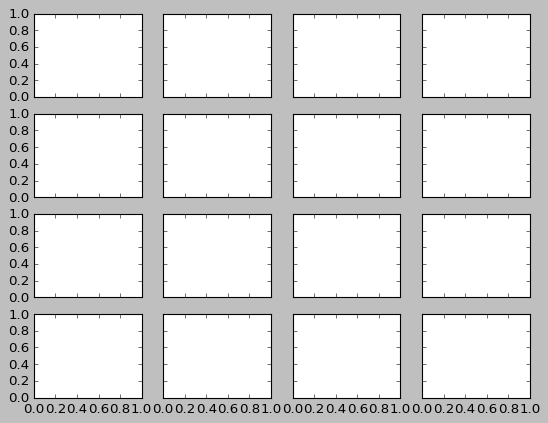

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

特别是 x 轴，标签的数字就快重叠在一起了，这让这些标签难以认清。我们可以通过plt.MaxNLocator()来修正这点，用它可以设置最大展示刻度的数量。Matplotlib 会自己计算按照这个最大数量计算的刻度位置：

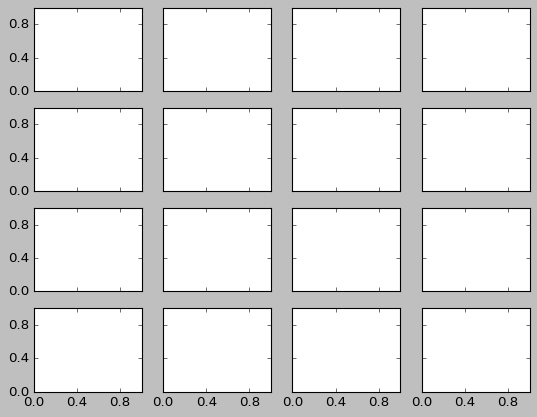

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

# 对x和y轴设置刻度最大数量
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

# fig

上图就清晰多了。如果你希望对于刻度位置进行更加精细的控制，你可以使用plt.MultipleLocator，我们会接下来讨论这个对象。

### 复杂的刻度格式
Matplotlib 的默认刻度格式只能在很多常见情况下工作良好，但是在特殊情况下你会希望能够更多的进行个性化。考虑下面的正弦和余弦图表：

(0.0, 9.42477796076938)

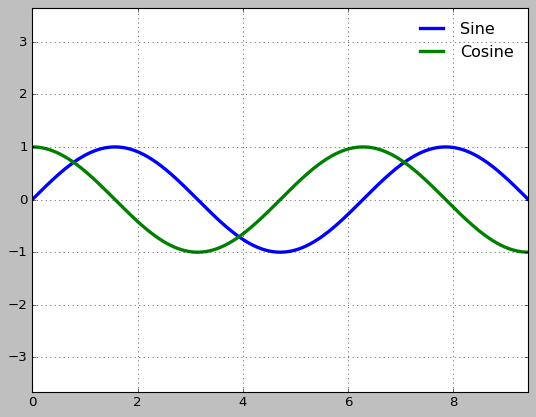

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

# 绘制正弦和余弦图表
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# 设置网格、图例和轴极限
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

这里有几个我们希望进行的改变。首先，如果刻度的间距和网格线是$\pi$的倍数会显得更加自然。我们可以通过MultipleLocator来设置它，这个对象用来设置刻度的配置。为了更直观，我们设置主要刻度为$\frac{\pi}{2}$位置，设置次要刻度为$\frac{\pi}{4}$位置：

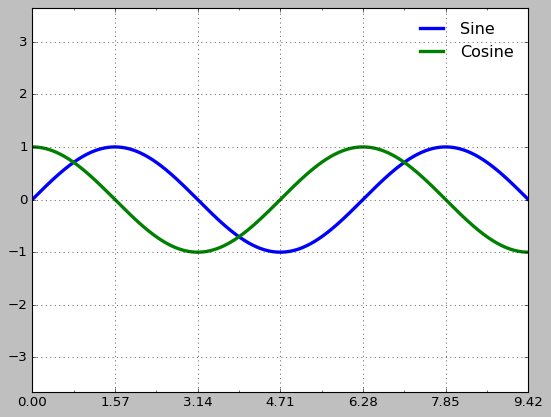

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

# 绘制正弦和余弦图表
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# 设置网格、图例和轴极限
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))

# fig

但是上图看起来有点傻：我们可以看出刻度确实是  的倍数，但是使用了小数的展示让它们看起来很奇怪。要修正这些标签，我们需要修改刻度的 formatter。在这种情况中，没有內建的 formatter 可以给我们使用，因此我们使用plt.FuncFormatter，这个对象能够接受一个用户自定义的函数来提供对于刻度标签的精细控制：

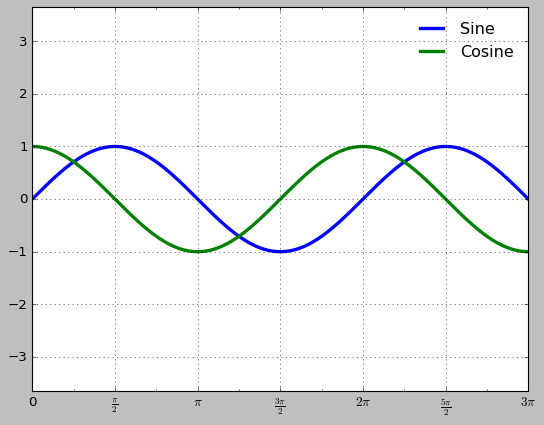

In [ ]:
def format_func(value, tick_number):
    # N是pi/2的倍数
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0" # 0点
    elif N == 1:
        return r"$\frac{\pi}{2}$" # pi/2
    elif N == 2:
        return r"$\pi$" # pi
    elif N % 2 > 0:
        return r"$\frac{{%d}\pi}{2}$" %N # n*pi/2 n是奇数
    else:
        return r"${0}\pi$".format(N // 2) # n*pi n是整数

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

上图看起来好多了。注意到我们使用到了 Matplotlib 的 LaTeX 支持，使用美元符号将 LaTeX 字符串括起来。这是用来展示数学符号和公式的简便方法：在这个例子中"$\pi$"被渲染成希腊字母$\pi$。

plt.FuncFomatter()提供了对于图表刻度最高级的自定义和精细控制，并且当你需要创建需要印刷或出版的图表时非常方便。

## 11.在 matplotlib 中创建三维图表
Matplotlib 最开始被设计为仅支持二维的图表。到 1.0 版本发布左右，一些三维图表的工具在二维展示的基础上被创建了出来，结果就是 Matplotlib 提供了一个方便的（同时也是有限的）的可用于三维数据可视化的一套工具。三维图表可以使用载入mplot3d工具包来激活，这个包会随着 Matplotlib 自动安装：

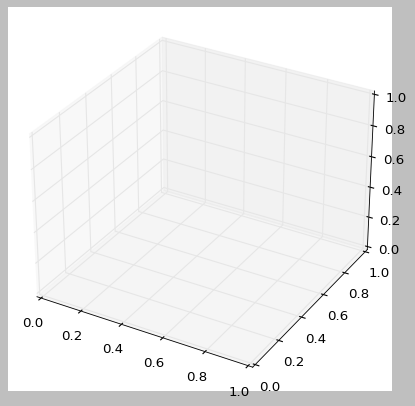

In [ ]:
from mpl_toolkits import mplot3d # 一旦模块被导入，三维 axes 就可以像其他普通 axes 一样通过关键字参数projection='3d'来创建
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

三维 axes 激活后，我们可以在上面绘制不同的三维图表类型。三维图表在 notebook 中使用交互式图表展示会优于使用静态展示；回忆我们前面介绍过，你可以使用%matplotlib notebook而不是%matplotlib inline来激活交互式展示模式。

### 三维的点和线
三维图表中最基础的是使用(x, y, z)坐标定义的一根线或散点的集合。前面介绍过普通的二维图表，作为类比，使用ax.plot3D和ax.scatter3D函数可以创建三维折线和散点图。这两个函数的签名与二维的版本基本一致，你可以参考[简单折线图]和[简单散点图]来复习一下这部分的内容。下面我们绘制一个三维中的三角螺旋，在线的附近在绘制一些随机的点：

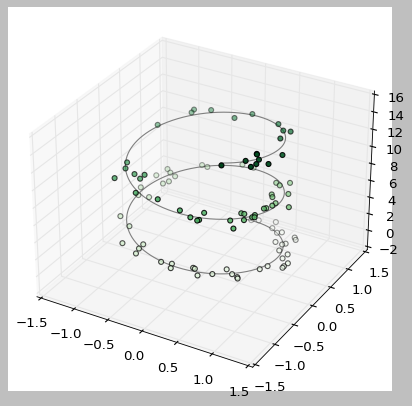

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

# 三维螺旋线的数据
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# 三维散点的数据
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

注意默认情况下，图中的散点会有透明度的区别，用于体现在图中散点的深度。虽然三维效果在静态图像中难以显示，你可以使用交互式的视图来获得更佳的三维直观效果。

### 三维轮廓图
类似于我们在[密度和轮廓图]中介绍的内容，mplot3d也包含着能够创建三维浮雕图像的工具。就像二维的ax.contour图表，ax.contour3D要求输入数据的格式是二维普通网格上计算得到的 Z 轴的数据值。下面我们展示一个三维的正弦函数轮廓图

Text(0.5, 0, 'z')

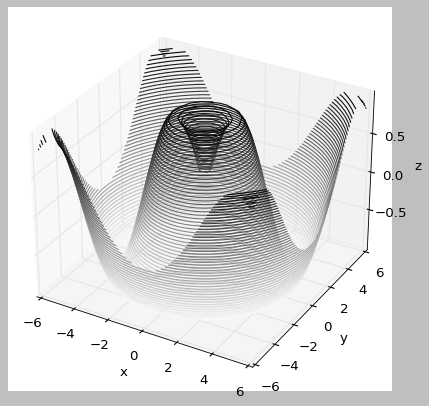

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

有时候默认的视角角度不是最理想的，在这种情况下我们可以使用view_init函数来设置水平角和方位角。在下面的例子中，我们使用的是 60° 的水平角（即以 60° 俯视 x-y 平面）和 35° 的方位角（即将 z 轴逆时针旋转 35°）：

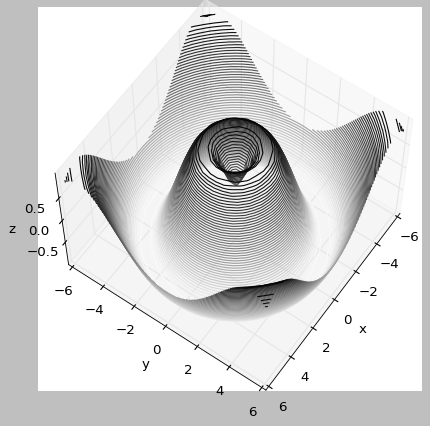

In [ ]:
ax.view_init(60, 35)
fig

同样，注意到当使用 Matplotlib 交互式展示是，这样的旋转可以通过鼠标点击和拖拽来实现。

### 框线图和表面图
使用网格数据生成的三维图表还有框线图和表面图。这两种图表将网格数据投射到特定的三维表面，能够使得结果图像非常直观和具有说服力。下面是一个框线图的例子：

Text(0.5, 0.92, 'wireframe')

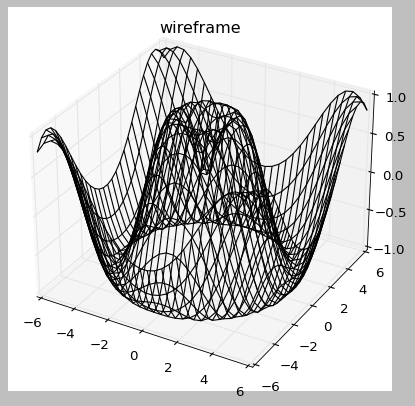

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')

表面图类似框线图，区别在于每个框线构成的多边形都使用颜色进行了填充。添加色图用于填充多边形能够让图形表面展示出来：

Text(0.5, 0.92, 'surface')

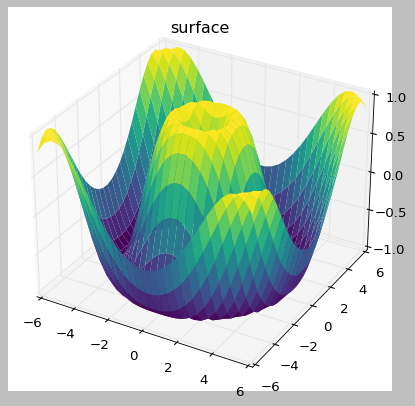

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface')

注意虽然每个颜色填充的表面都是二维的，但是表面的边缘不需要是直线构成的。下面的例子使用surface3D绘制了一个部分极坐标网格，能够让我们切入到函数内部观察效果：

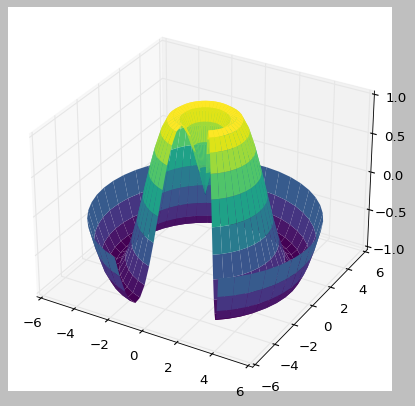

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

### 表面三角剖分
在一些应用场合中，上面的这种均匀网格绘制的图表方式太过于局限和不方便。在这些情况下，三角剖分的图表可以派上用场。如果我们并不是使用笛卡尔坐标系或极坐标系的网格来绘制三维图表，而是使用一组随机的点来绘制三维图表呢？

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

有了上面的数据之后，我们可以使用它们来绘制一张散点图表现出样本所在表面的情况：

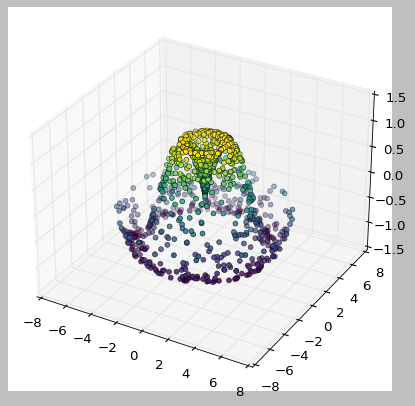

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)

上图并未形象的表示出表面情况。这种情况下我们可以使用ax.plot_trisurf函数，它能首先根据我们的数据输入找到各点内在的三角函数形式，然后绘制表面（注意的是这里的 x，y，z 是一维的数组）：

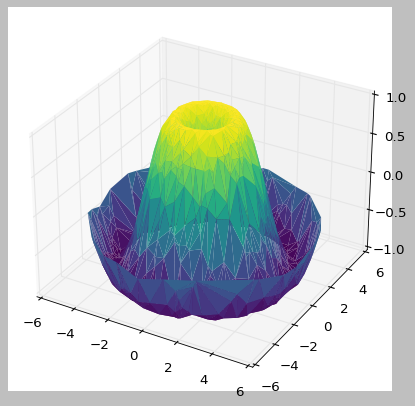

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none')

上图的结果很显然没有使用网格绘制表面图那么清晰，但是对于我们并不是使用函数构建数据样本（数据样本通常来自真实世界的采样）的情况下，这能提供很大的帮助。例如我们下面会看到，能使用这种方法绘制一条三维的莫比乌斯环。

## 12.绘制莫比乌斯环
莫比乌斯环是使用一条纸条，一端翻折后与另一端粘起来形成的环形。在拓扑学中这是非常有趣的一个形状，因为它只有一个面。我们下面使用 Matplotlib 的三维工具绘制莫比乌斯环。创建莫比乌斯环的关键在于能参数化它：莫比乌斯环是一个二维的环状结构，因此我们需要两个特定的维度。一个我们称为$\theta$ ，取值范围是$0-2\pi$表示整个环状，还有一个称为$\omega$，取值范围是$-1-1$表示纸带的宽度：

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

有了这两个参数之后，我们需要确定莫比乌斯环上*(x, y, z)*坐标的位置。

仔细思考一下，我们会发现在莫比乌斯环上有两个自转发生：一个是纸带绕环形中央位置的旋转（我们称为$\theta$），另一个纸带绕着中间轴线的旋转（我们称为$\phi$）。纸带中央位置旋转一整圈$2\pi$时，纸带绕中间轴线旋转刚好半圈$\pi$，我们将整个旋转均匀分布在纸带上时，就会有$\Delta \phi = \frac{\Delta \theta}{2}$。

In [ ]:
phi = 0.5 * theta

现在我们已经有了所有需要获得三维坐标值的参数了。我们定义$r$为每个坐标点距离环形中间的位置，使用它来计算最终$(x,y,z)$三维坐标系的坐标值：

In [ ]:
# r是坐标点距离环形中心的距离值
r = 1 + w * np.cos(phi)
# 利用简单的三角函数知识算得x，y，z坐标值
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

最后，为了绘制对象，我们必须保证三角剖分是正确的。实现这个最好的方法是在底层的参数上面实现三角剖分，最后让 Matplotlib 将这个三角剖分投射到三维空间中形成莫比乌斯环。下面的代码最终绘制图形：

(-1.0, 1.0)

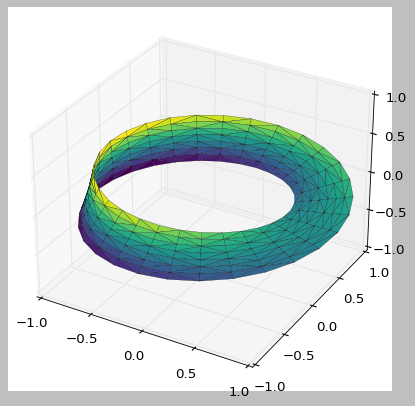

In [ ]:
# 在底层参数的基础上进行三角剖分
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1)

结合这些技巧，能够为你提供在 Matplotlib 创建和展现大量三维对象和模式的能力。